In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate, cross_val_score

In [2]:
df = pd.read_csv("../raw_data/all_pib_ML.csv")

In [3]:
df['Docentes'] = df['Docentes'].str.replace(',', '.', regex=True).replace(' -   ', '0', regex=True)

In [4]:
df['Matrículas'] = df['Matrículas'].str.replace(',', '', regex=True).replace(' -   ', '0', regex=True)
df['Matrículas'] = df['Matrículas'].astype(float)

In [5]:
df['Unemployed'] = df['Unemployed'].str.replace(',', '', regex=True).replace(' -   ', '0', regex=True)
df['Unemployed'] = df['Unemployed'].astype(float)

In [6]:
print(df['Pib per capita'].dtype)

object


In [7]:
df['Turmas'] = df['Turmas'].str.replace(',', '.', regex=True).replace(' -   ', '0', regex=True)

In [8]:
df['Docentes'] = df['Docentes'].astype(float)

In [9]:
df['Turmas'] = df['Turmas'].astype(float)

In [10]:
df.isnull().sum()

Unnamed: 0             0
Ano                    0
Código_IBGE            0
Localização            0
Aprovação              0
Reprovação             0
Abandono               0
Matrículas             0
Docentes               0
Estabelecimentos       0
Turmas                 0
Regiao                 0
Código UF              0
UF                     0
Municipio              0
Magreza %              0
Acesso a internet %    0
Unemployed             0
Poverty_Rate           0
PIB                    0
Population             0
Valor_Consolidado      0
Pib per capita         0
dtype: int64

In [11]:
df.head()

,Unnamed: 0,Ano,Código_IBGE,Localização,Aprovação,Reprovação,Abandono,Matrículas,Docentes,Estabelecimentos,...,UF,Municipio,Magreza %,Acesso a internet %,Unemployed,Poverty_Rate,PIB,Population,Valor_Consolidado,Pib per capita
0,28183,2012,1100023,Rural,92.6,4.0,3.4,498.0,42.0,1,...,RO,ARIQUEMES,"2,03%",21.0,635.0,31.61,18938.68679,92747.0,35517787.24,"18.368,70"
1,28184,2012,1100023,Urbana,69.9,16.6,13.5,3453.0,172.0,6,...,RO,ARIQUEMES,"2,03%",21.0,635.0,31.61,18938.68679,92747.0,35517787.24,"18.368,70"
2,28185,2012,1100031,Rural,92.1,2.6,5.3,38.0,6.0,1,...,RO,CABIXI,"8,81%",21.0,635.0,31.61,18938.68679,6132.0,1521376.74,"16.240,46"
3,28186,2012,1100031,Urbana,91.3,5.2,3.5,230.0,22.0,1,...,RO,CABIXI,"8,81%",21.0,635.0,31.61,18938.68679,6132.0,1521376.74,"16.240,46"
4,28187,2012,1100064,Rural,90.6,9.2,0.2,415.0,42.0,1,...,RO,COLORADO DO OESTE,"6,92%",21.0,635.0,31.61,18938.68679,18093.0,2814808.69,"12.273,84"


In [12]:
df.tail()

,Unnamed: 0,Ano,Código_IBGE,Localização,Aprovação,Reprovação,Abandono,Matrículas,Docentes,Estabelecimentos,...,UF,Municipio,Magreza %,Acesso a internet %,Unemployed,Poverty_Rate,PIB,Population,Valor_Consolidado,Pib per capita
62169,93447,2020,5221858,Urbana,93.0,5.9,1.1,5.069,276.0,12,...,GO,VALPARAISO DE GOIAS,"5,89%",81.0,12425.0,18.05,31506.97,172135.0,1.073406e+08,"15.621,31"
62170,93448,2020,5221908,Urbana,100.0,0.0,0.0,125.000,12.0,1,...,GO,VARJAO,"8,70%",81.0,12425.0,18.05,31506.97,3838.0,1.476294e+06,"22.092,62"
62171,93449,2020,5222005,Urbana,97.2,2.6,0.2,496.000,23.0,1,...,GO,VIANOPOLIS,"5,30%",81.0,12425.0,18.05,31506.97,13977.0,7.186561e+06,"42.019,96"
62172,93450,2020,5222054,Urbana,99.2,0.8,0.0,362.000,18.0,1,...,GO,VICENTINOPOLIS,"3,79%",81.0,12425.0,18.05,31506.97,8873.0,6.174362e+06,"47.171,97"
62173,93451,2020,5222203,Urbana,100.0,0.0,0.0,229.000,11.0,1,...,GO,VILA BOA,"2,63%",81.0,12425.0,18.05,31506.97,6312.0,4.461612e+06,"19.310,39"


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62174 entries, 0 to 62173
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           62174 non-null  int64  
 1   Ano                  62174 non-null  int64  
 2   Código_IBGE          62174 non-null  int64  
 3   Localização          62174 non-null  object 
 4   Aprovação            62174 non-null  float64
 5   Reprovação           62174 non-null  float64
 6   Abandono             62174 non-null  float64
 7   Matrículas           62174 non-null  float64
 8   Docentes             62174 non-null  float64
 9   Estabelecimentos     62174 non-null  int64  
 10  Turmas               62174 non-null  float64
 11  Regiao               62174 non-null  object 
 12  Código UF            62174 non-null  float64
 13  UF                   62174 non-null  object 
 14  Municipio            62174 non-null  object 
 15  Magreza %            62174 non-null 

In [14]:
data = df[['Localização', 'Matrículas', 'Estabelecimentos']]
data.head()

,Localização,Matrículas,Estabelecimentos
0,Rural,498.0,1
1,Urbana,3453.0,6
2,Rural,38.0,1
3,Urbana,230.0,1
4,Rural,415.0,1


In [15]:
df_temp = df.copy()

## Analysis  

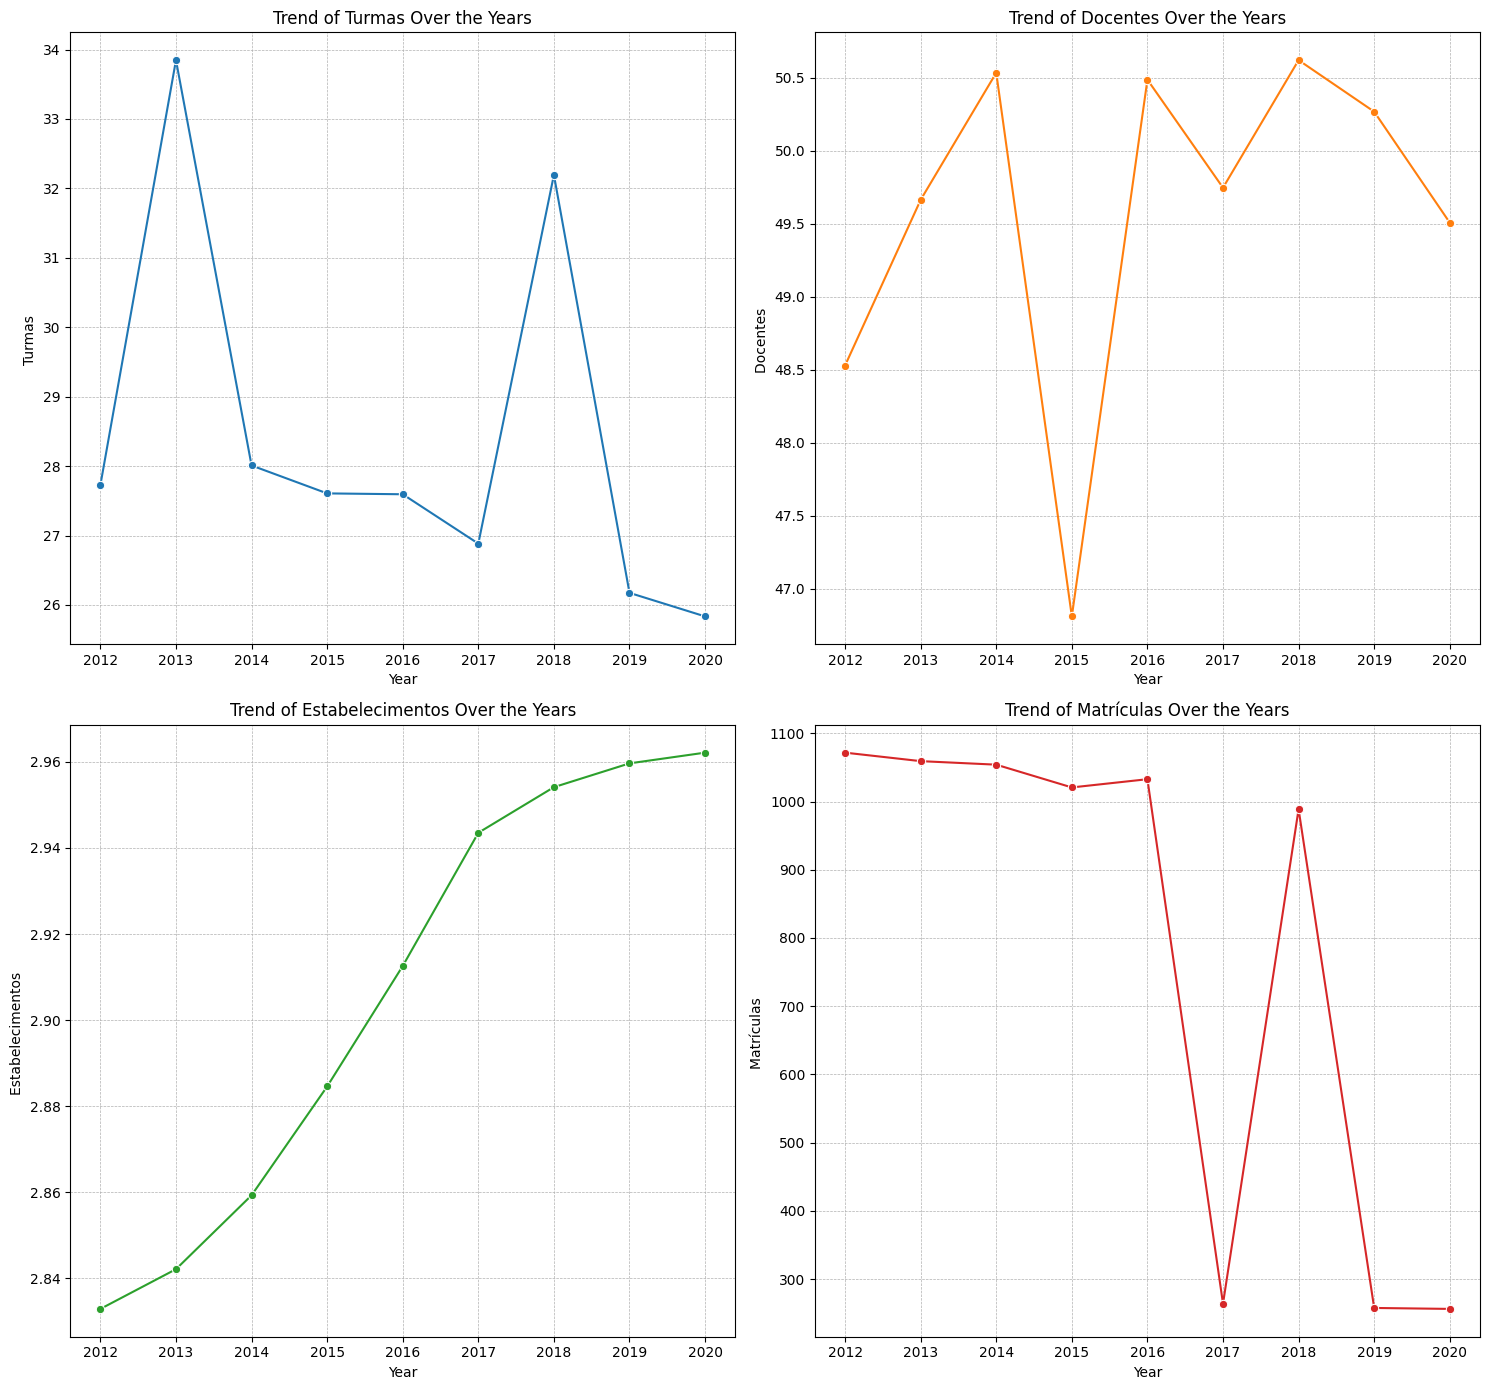

In [16]:
# Features for trend analysis
trend_features = ['Turmas', 'Docentes', 'Estabelecimentos', 'Matrículas']

# Group by year and calculate the mean for each feature
yearly_means = df.groupby('Ano')[trend_features].mean()

# Create subplots
num_rows = len(trend_features) // 2 + len(trend_features) % 2  # Calculating the number of rows
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(15, 7 * num_rows))

# Plotting trends for each feature
for idx, feature in enumerate(trend_features):
    row_idx = idx // 2
    col_idx = idx % 2
    ax = axes[row_idx, col_idx]
    
    sns.lineplot(x=yearly_means.index, y=yearly_means[feature], ax=ax, marker='o', color=sns.color_palette("tab10")[idx])
    ax.set_title(f'Trend of {feature} Over the Years')
    ax.set_xlabel('Year')
    ax.set_ylabel(f'{feature} ')
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Remove any unused subplots
for idx in range(len(trend_features), num_rows * 2):
    fig.delaxes(axes.flatten()[idx])

plt.tight_layout()
plt.show()

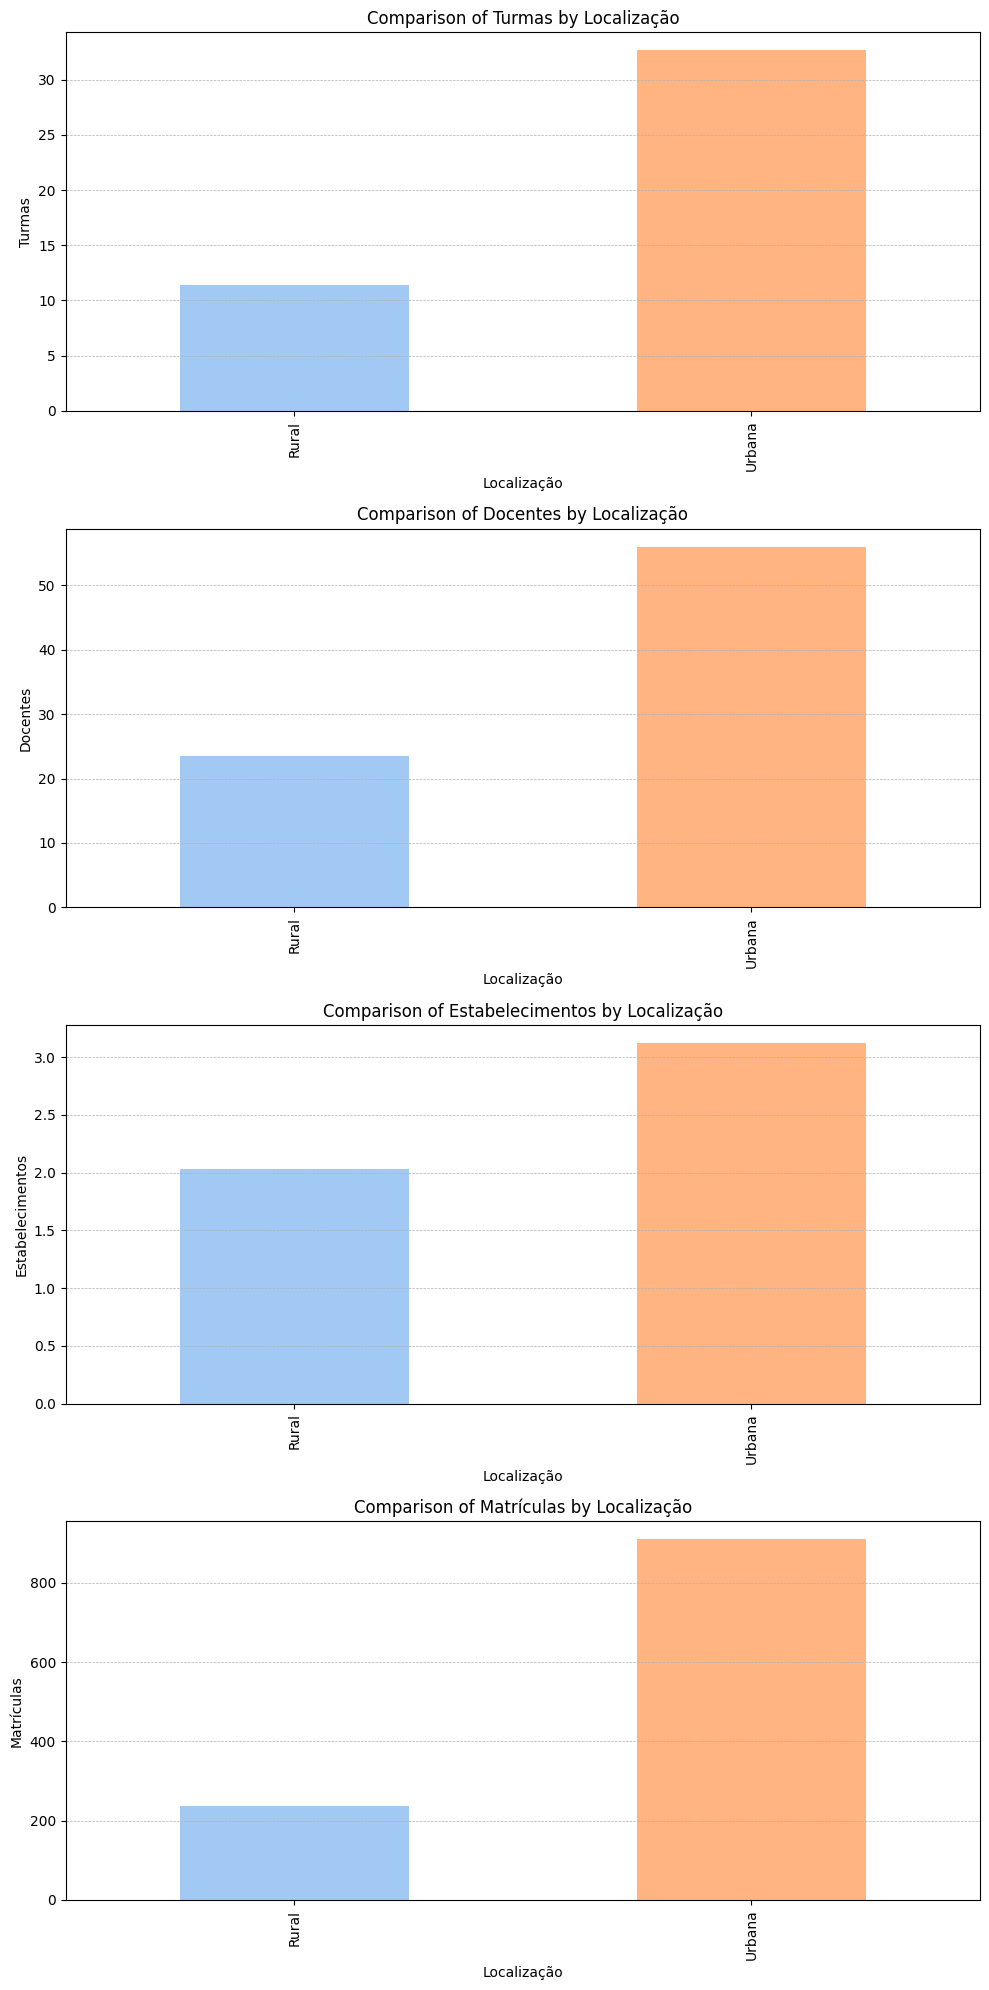

In [17]:
# Group by 'Localização' and calculate the mean for each feature
location_means = df.groupby('Localização')[trend_features].mean()

# Calculate the number of rows based on the number of features
num_rows = len(trend_features)
fig, axes = plt.subplots(nrows=num_rows, ncols=1, figsize=(10, 5 * num_rows))

# Plotting bar plots for each feature
for idx, feature in enumerate(trend_features):
    ax = axes[idx]
    location_means[feature].plot(kind='bar', ax=ax, color=sns.color_palette("pastel", 2))
    ax.set_title(f'Comparison of {feature} by Localização')
    ax.set_ylabel(f'{feature}')
    ax.set_xlabel('Localização')
    ax.grid(True, which='both', linestyle='--', linewidth=0.5, axis='y')

plt.tight_layout()
plt.show()


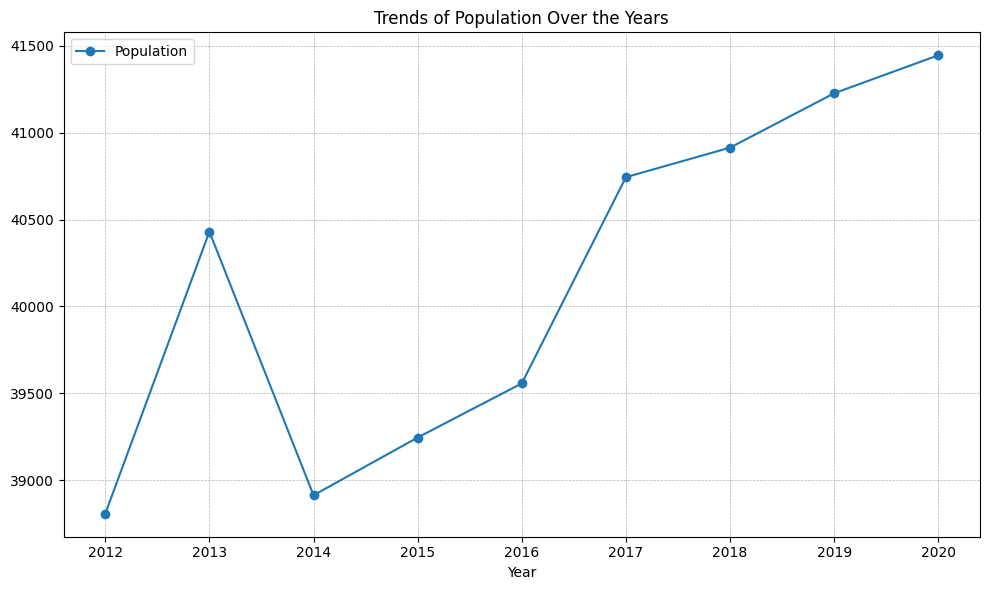

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Features for trend analysis
trend_features = ['Population']

# Group by year and calculate the mean for each feature
yearly_means = df.groupby('Ano')[trend_features].mean()

# Plotting trends for each feature with a logarithmic y-scale
plt.figure(figsize=(10, 6))

for feature in trend_features:
    plt.plot(yearly_means.index, yearly_means[feature], marker='o', label=feature)

plt.title('Trends of Population Over the Years')
plt.xlabel('Year')

plt.yscale('linear')  # Setting the y-scale to logarithmic
plt.legend()
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()






In [19]:
df.sort_values(by='Pib per capita', ascending=False)

,Unnamed: 0,Ano,Código_IBGE,Localização,Aprovação,Reprovação,Abandono,Matrículas,Docentes,Estabelecimentos,...,UF,Municipio,Magreza %,Acesso a internet %,Unemployed,Poverty_Rate,PIB,Population,Valor_Consolidado,Pib per capita
57789,88830,2020,5005103,Urbana,93.2,4.9,1.9,102.0,22.0,1,...,MS,JATEI,"0,00%",81.0,995.0,16.38,43649.17000,4021.0,1644219.47,"99.933,83"
57788,88829,2020,5005103,Rural,89.5,1.8,8.7,56.0,11.0,1,...,MS,JATEI,"0,00%",81.0,995.0,16.38,43649.17000,4021.0,1644219.47,"99.933,83"
25772,55206,2015,3501152,Urbana,95.1,4.9,0.0,645.0,22.0,1,...,SP,ALUMINIO,"2,16%",60.0,93.0,12.37,43694.94456,18061.0,11805229.15,"99.922,32"
39869,69992,2017,3527603,Urbana,73.0,20.7,6.3,444.0,24.0,1,...,SP,LUIS ANTONIO,"7,83%",69.0,134.0,15.74,47028.89316,14021.0,9342928.99,"99.812,91"
46822,77289,2018,3527603,Urbana,72.3,18.5,9.2,455.0,33.0,1,...,SP,LUIS ANTONIO,"2,94%",73.0,13275.0,14.22,48542.23975,14592.0,9901559.69,"99.450,16"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21710,50942,2015,2901106,Urbana,78.1,18.3,3.6,739.0,21.0,2,...,BA,AMELIA RODRIGUES,"4,92%",40.0,1225.0,39.92,16117.12401,26441.0,11642379.88,"10.000,25"
21709,50941,2015,2901106,Rural,97.3,2.7,0.0,75.0,0.0,1,...,BA,AMELIA RODRIGUES,"4,92%",40.0,1225.0,39.92,16117.12401,26441.0,11642379.88,"10.000,25"
34443,64340,2017,1300029,Rural,81.9,10.2,7.9,127.0,35.0,2,...,AM,ALVARAES,"2,84%",48.0,15675.0,48.95,22945.13970,15908.0,14377638.73,"10.000,16"
34444,64341,2017,1300029,Urbana,76.7,23.0,0.3,623.0,28.0,1,...,AM,ALVARAES,"2,84%",48.0,15675.0,48.95,22945.13970,15908.0,14377638.73,"10.000,16"


In [20]:
df['Pib per capita']

0         18.368,70 
1         18.368,70 
2         16.240,46 
3         16.240,46 
4         12.273,84 
            ...     
62169     15.621,31 
62170     22.092,62 
62171     42.019,96 
62172     47.171,97 
62173     19.310,39 
Name: Pib per capita, Length: 62174, dtype: object

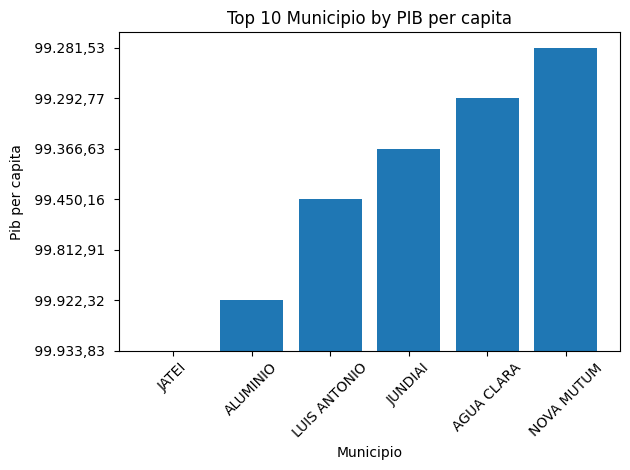

In [21]:
Pib = 'Pib per capita'

top_ten_county_df = df.sort_values(Pib, ascending=False).head(10)

plt.bar(top_ten_county_df['Municipio'], top_ten_county_df[Pib])
plt.xlabel('Municipio')
plt.ylabel('Pib per capita')
plt.title('Top 10 Municipio by PIB per capita')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

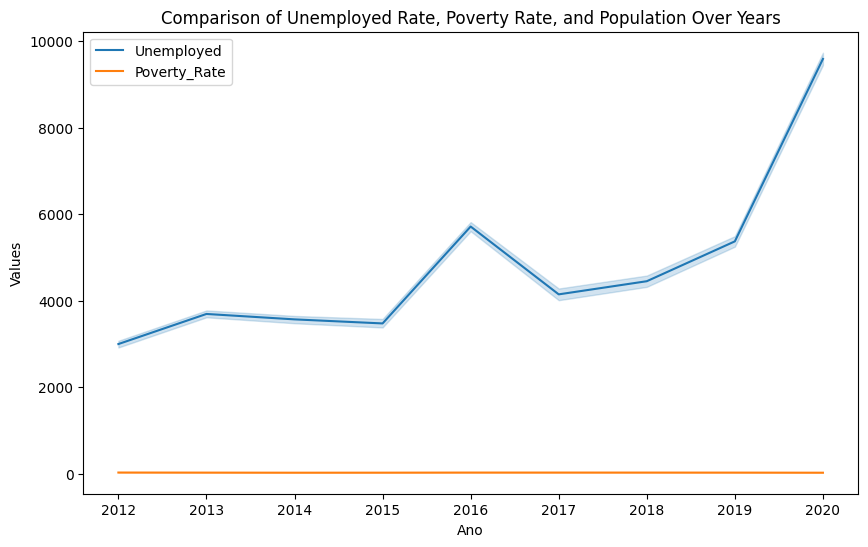

In [22]:
plt.figure(figsize=(10, 6))

# Plot dos dados originais
sns.lineplot(data=df, x='Ano', y='Unemployed', label='Unemployed')
sns.lineplot(data=df, x='Ano', y='Poverty_Rate', label='Poverty_Rate')




plt.xlabel('Ano')
plt.ylabel('Values')
plt.title('Comparison of Unemployed Rate, Poverty Rate, and Population Over Years')
plt.legend()

plt.show()

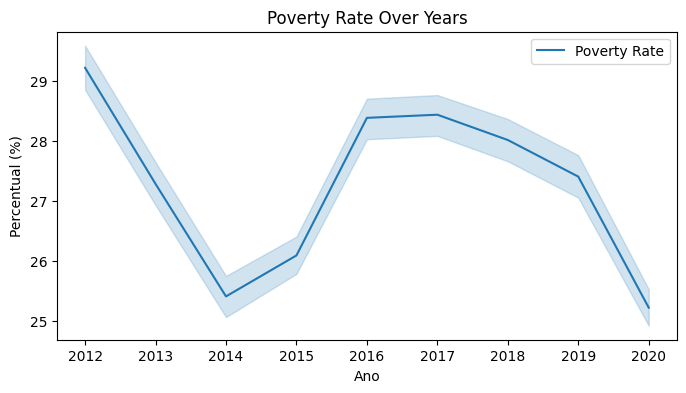

In [23]:

plt.figure(figsize=(8, 4))

# Plot dos dados originais
sns.lineplot(data=df, x='Ano', y= 'Poverty_Rate', label='Poverty Rate')



plt.xlabel('Ano')
plt.ylabel('Percentual (%)')
plt.title('Poverty Rate Over Years')
plt.show()









In [24]:
data = df[['Poverty_Rate']]
data.head()

,Poverty_Rate
0,31.61
1,31.61
2,31.61
3,31.61
4,31.61


In [32]:
# Calcular o crescimento e adicionar como nova coluna
Poverty_growth = df['Poverty_Rate'].pct_change() * 100



In [33]:
print(Poverty_growth)

0        NaN
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
62169    0.0
62170    0.0
62171    0.0
62172    0.0
62173    0.0
Name: Poverty_Rate, Length: 62174, dtype: float64


In [35]:
# Plot dos dados originais
sns.lineplot(data=df, x='Ano', y= 'Poverty_growth', label='Poverty Growth')


# Verificar se 'Poverty_growth' está na lista de colunas
if 'Poverty_growth' in df.columns:
    # Plot dos dados originais
    sns.lineplot(data=df, x='Ano', y='Poverty_growth', label='Poverty Growth')
else:
    print("'Poverty_growth' não encontrada no DataFrame.")

ValueError: Could not interpret value `Poverty_growth` for parameter `y`

In [39]:
df['Magreza %'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 62174 entries, 0 to 62173
Series name: Magreza %
Non-Null Count  Dtype 
--------------  ----- 
62174 non-null  object
dtypes: object(1)
memory usage: 485.9+ KB


In [43]:

df['Magreza %'] = pd.to_numeric(df['Magreza %'].str.replace(',', '.').str.rstrip('%'), errors='coerce') / 100

print(df['Magreza %'])

0        0.0203
1        0.0203
2        0.0881
3        0.0881
4        0.0692
          ...  
62169    0.0589
62170    0.0870
62171    0.0530
62172    0.0379
62173    0.0263
Name: Magreza %, Length: 62174, dtype: float64


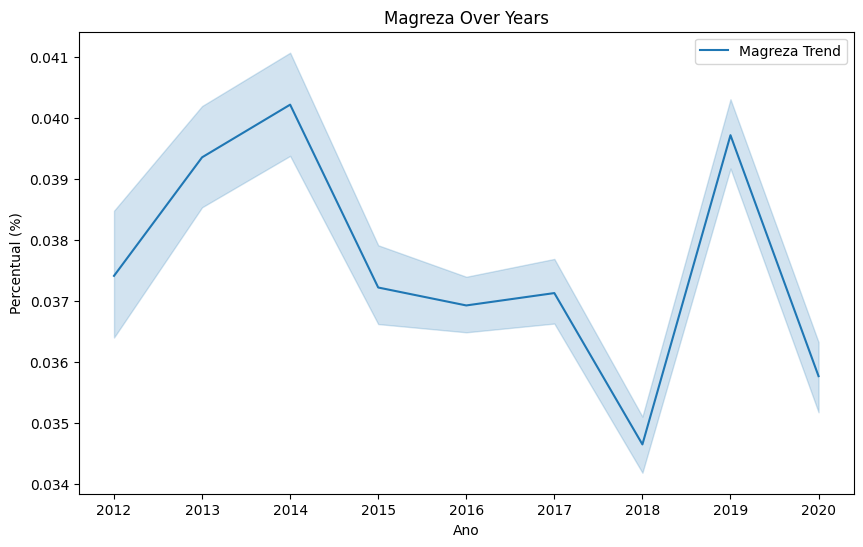

In [49]:

plt.figure(figsize=(10, 6))

# Plot dos dados originais
sns.lineplot(data=df, x='Ano', y= 'Magreza %', label='Magreza Trend')



plt.xlabel('Ano')
plt.ylabel('Percentual (%)')
plt.title('Magreza Over Years')




plt.show()



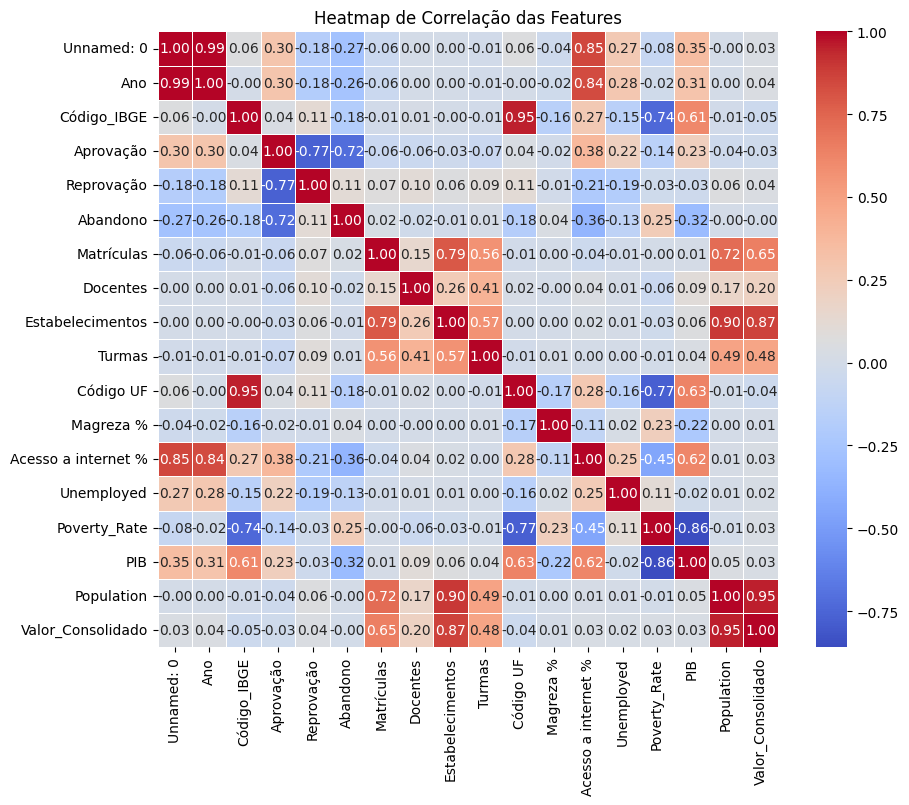

In [57]:
numeric_columns = df.select_dtypes(include=['float64', 'int64'])

# Calcula a matriz de correlação
correlation_matrix = numeric_columns.corr()

# Cria um heatmap de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap de Correlação das Features')
plt.show()